# CS4661 - Homework 3

Jaquan Jones

## Question2: Debt Prediction

### A. Read the dataset file “Credit.csv” (from github using the following command), and assign it to a Pandas DataFrame

In [29]:
# library imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import scale

In [30]:
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Credit.csv")

df

,Income,Limit,Rating,Cards,Age,Education,Married,Balance
0,14.891,3606,283,2,34,11,1,333
1,106.025,6645,483,3,82,15,1,903
2,104.593,7075,514,4,71,11,0,580
3,148.924,9504,681,3,36,11,0,964
4,55.882,4897,357,2,68,16,1,331
...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,560
396,13.364,3838,296,5,65,17,0,480
397,57.872,4171,321,5,67,12,1,138
398,37.728,2525,192,1,44,13,1,0


### B. Check out the dataset. The “Credit” dataset includes the “balance” column (average credit card debt for a number of individuals) as target, as well as several features: age, cards (number of credit cards), education (years of education), income (in thousands of dollars), limit (credit limit), marital status, and rating (credit rating).

In [31]:
# feature columns
feature_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Married']

X = df[feature_cols]

X

,Income,Limit,Rating,Cards,Age,Education,Married
0,14.891,3606,283,2,34,11,1
1,106.025,6645,483,3,82,15,1
2,104.593,7075,514,4,71,11,0
3,148.924,9504,681,3,36,11,0
4,55.882,4897,357,2,68,16,1
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1
396,13.364,3838,296,5,65,17,0
397,57.872,4171,321,5,67,12,1
398,37.728,2525,192,1,44,13,1


In [32]:
# target column
y = df['Balance']

y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

### C. Generate the feature matrix and target vector (target is “balance” in this dataset). Then, normalize (scale) the features (note: don’t normalize the target vector!). To normalize the data, you can simply use scale(X)  from sklearn.


In [33]:
# scaling feature matrix
X = scale(X, axis=0, with_mean=True, with_std=True, copy=True)

X

array([[-0.86158299, -0.48999879, -0.46553881, ..., -1.2576741 ,
        -0.78492991,  0.79539491],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  1.5284506 ,
         0.49658831,  0.79539491],
       [ 1.68675551,  1.01478681,  1.02931059, ...,  0.88996369,
        -0.78492991, -1.25723711],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.65778663,
        -0.46455035,  0.79539491],
       [-0.21280808, -0.95891584, -1.05441888, ..., -0.67723146,
        -0.1441708 ,  0.79539491],
       [-0.75334493,  0.34199278,  0.38866085, ...,  0.48365384,
        -2.06644812, -1.25723711]])

### D. Split the dataset into testing and training sets with the following parameters: test_size=0.24, random_state=4.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)

print(X_train.shape)
print(y_train.shape)
print('\t\t\t***X_train***\n')
print(X_train)
print('\n\t***y_train***\n')
print(y_train)

(304, 7)
(304,)
			***X_train***

[[-0.88314537 -0.75373752 -0.67261752 ...  1.12214075  1.13734742
  -1.25723711]
 [-0.94283255 -0.67392185 -0.62084784 ...  0.13538825  1.45772697
   0.79539491]
 [-0.7462427  -1.41004788 -1.46210508 ...  1.5284506  -0.1441708
  -1.25723711]
 ...
 [ 0.15568424 -0.32906612 -0.32964341 ...  1.64453913  1.13734742
  -1.25723711]
 [ 2.176554    2.57553014  2.55651604 ... -0.09678881  0.81696786
  -1.25723711]
 [ 0.49383583  1.00654497  0.81576068 ...  1.64453913 -0.78492991
  -1.25723711]]

	***y_train***

63      133
105     210
318       0
287       0
60      631
       ... 
360     712
385     905
197      69
174    1573
122     904
Name: Balance, Length: 304, dtype: int64


### E. Use Linear Regression to train a linear model on the training set. Check the coefficients of the linear regression model. Which feature is the most important? Which feature is the least important?

---
**Answer E:**</br>
**Most important feature:** Rating</br>
**Least important feature:** Education</br>

---
>**Let**:
Income = $I$,
Limit= $L$,
Rating= $R$,
Cards = $C$,
Age= $A$,
Education = $E$,
Married = $M$
>> $\Theta_0 = 517.692$, 
$\Theta_1 = -264.9837$, 
$\Theta_2 = 131.9916$, 
$\Theta_3 = 478.5317$, 
$\Theta_4 = 14.7212$, 
$\Theta_5 = -29.7833$, 
$\Theta_6 = 1.6783$, 
$\Theta_7 = -20.2062$</br>


>> **Predictive model**:</br></br>
$y = \Theta_0 + ( \Theta_1 \bullet I) + (\Theta_2\bullet L) + (\Theta_3 \bullet R) + (\Theta_4 \bullet C) + (\Theta_5 \bullet A) + (\Theta_6 \bullet E) + (\Theta_7 \bullet M)$</br></br>

>>$y = 517.692 + ( -264.9837 \bullet I) + (131.9916 \bullet L) + (478.5317 \bullet R) + (14.7212 \bullet C) + (-29.7833 \bullet A) + (1.6783 \bullet E) + (-20.2062 \bullet M)$



In [35]:
# linear regression instance
lr = LinearRegression()

# fitting model to the training data
lr.fit(X_train, y_train)


LinearRegression()

In [36]:
# printing Theta_0 using attribute 'intercept_'
print(f'Intercept, Theta_0: {lr.intercept_}\n')

# printing [Theta_1, Theta_2, Theta_3] using attribute 'coef_'
print(f'[Theta_1, Theta_2, ..., Theta_7]: {lr.coef_}\n')



Intercept, Theta_0: 517.6919750342976

[Theta_1, Theta_2, ..., Theta_7]: [-264.98372644  131.99156792  478.53169403   14.72121881  -29.7832935
    1.67827514  -20.20616103]



Feature 0: Income
Score: -264.9837264395968

Feature 1: Limit
Score: 131.991567915362

Feature 2: Rating
Score: 478.5316940349278

Feature 3: Cards
Score: 14.721218808685336

Feature 4: Age
Score: -29.783293502230666

Feature 5: Education
Score: 1.678275139971817

Feature 6: Married
Score: -20.206161027400846



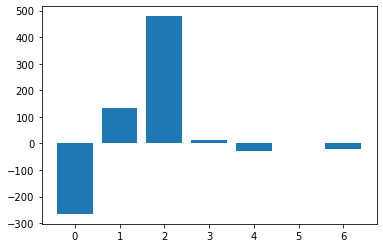

In [37]:
from matplotlib import pyplot

importance = lr.coef_

for i, v in enumerate(importance):
    print(f'Feature {i}: {feature_cols[i]}\nScore: {v}\n')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### F. Predict “balance” for the users in testing set. Then, compare the predicted balance with the actual balance by calculating and reporting the RMSE (as we saw in lab tutorial 4).

---
**Answer F:**</br>
**RMSE**: $161.51385491175324$

In [38]:
y_prediction = lr.predict(X_test)

print(y_prediction)

[ 1.40192822e+03  3.72390498e+02  3.09606997e+02  7.75587837e+02
  3.63641910e+02  9.54490329e+02  3.20745279e+02 -2.32591690e+02
  3.99394342e+02  6.01919205e+02 -2.52478552e+02  3.82362570e+02
  4.72524424e+02  7.15924136e+02  1.11080816e+01  6.76777695e+02
 -1.10205182e+02  2.34123414e+02 -2.17604376e+02  1.36106372e+03
  3.62716990e+02 -7.18441620e+01  3.46590403e+02 -3.48468421e+00
 -1.98897875e+02 -3.79979558e+01  7.87248445e+02  3.41641943e+02
  6.76645933e+02 -5.36248977e+01  7.73056436e+02  1.50270904e+01
  9.34623394e+02  3.80185173e+02  7.48107862e+02 -2.85720687e+02
  1.00583355e+03  5.07594510e+02 -1.40361418e+02  1.10973338e+03
  1.08474720e+03  3.98005654e+02  6.40559128e+02  9.08998220e+02
  6.99056037e+02  7.92919368e+02  3.82003132e+02  9.70862036e+02
  3.34390882e+02  1.16908059e+03  2.43605505e+02  2.78833488e+02
 -6.23362942e-01  3.85459830e+01  2.49931072e+02  8.25222693e+02
 -1.98555175e+02  5.71140218e+01  1.17285043e+03  9.81760238e+02
 -6.84711889e+00  2.70524

In [39]:
mse = mean_squared_error(y_test, y_prediction)

rmse = np.sqrt(mse)

print(rmse)

161.51385491175324


### G. Now, use 10-fold Cross-Validation to evaluate the performance of a linear regression in predicting the balance. Thus, rather than splitting the dataset into testing and training, use Cross-Validation to evaluate the regression performance. What is the RMSE when you use cross validation?

---
**Answer G:**</br>
**RMSE w/ Cross-Validation (mean)**: $160.33198910744136$

In [40]:
accuracy_list = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

print(accuracy_list)

[-23646.90415343 -32003.04401232 -35462.64435619 -37327.60719635
 -14341.32205939 -33628.37104224 -31631.99317834 -12491.00334951
 -20749.61212175 -23204.94743459]


In [41]:
mse_list_positive = -accuracy_list

rmse_list = np.sqrt(mse_list_positive)

print(rmse_list)

[153.7754992  178.89394627 188.31527914 193.20353826 119.75525901
 183.38039983 177.85385343 111.76315739 144.04725656 152.331702  ]


In [42]:
print('Mean value of RMSE list : ', rmse_list.mean())

Mean value of RMSE list :  160.33198910744133
